# Exploratory Data Analysis
This project is an academic project. The aim of this project is very simple, get some practical knowledge about:

- data exploration and cleaning
- feature engineering
- advance regression techniques
- model testing
- model deployment

In this notebook we will do all the data pre-processing tasks, from data exploration to cleaning garbage data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as matColors
from matplotlib.ticker import MaxNLocator
import seaborn as sns

import random

%matplotlib inline
# display all the collumns of the dataset
pd.pandas.set_option('display.max_columns', None)
# ignore warnings
import warnings
warnings.filterwarnings('once')

### Read data

In [2]:
dataset = pd.read_csv('./data/train.csv')
print('The shape of the dataframe is: {0}'.format(dataset.shape))
dataset.head()

The shape of the dataframe is: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing values
Here we will try to discover how much the missing features' values are related with the dependent variable, which is the SalePrice. If the feature has no correlation with the SalePrice collumn, the  we can adpot a simple solution like drop it. But if the feature is important for the dependent variable, then we have to handle the missing values, replace it with something significant. So now let's try to understand which missing features are important for us.

In [3]:
# find features which at least has a NaN value
features_with_nan_values = [features for features in dataset.columns if dataset[features].isnull().sum()>1]

# print percentage of the missing values
for feature in features_with_nan_values:
    print('{0} has {1}% of null values'.format(feature, np.round(dataset[feature].isnull().mean()*100, 4)))

LotFrontage has 17.7397% of null values
Alley has 93.7671% of null values
MasVnrType has 0.5479% of null values
MasVnrArea has 0.5479% of null values
BsmtQual has 2.5342% of null values
BsmtCond has 2.5342% of null values
BsmtExposure has 2.6027% of null values
BsmtFinType1 has 2.5342% of null values
BsmtFinType2 has 2.6027% of null values
FireplaceQu has 47.2603% of null values
GarageType has 5.5479% of null values
GarageYrBlt has 5.5479% of null values
GarageFinish has 5.5479% of null values
GarageQual has 5.5479% of null values
GarageCond has 5.5479% of null values
PoolQC has 99.5205% of null values
Fence has 80.7534% of null values
MiscFeature has 96.3014% of null values


In [4]:
# percentage of the feature which has at least one null value
print('{0}/{1} features has null values. Which is {2}%'.format(len(features_with_nan_values), len(dataset.columns), np.round(len(features_with_nan_values)*100/len(dataset.columns), 3)))

18/81 features has null values. Which is 22.222%


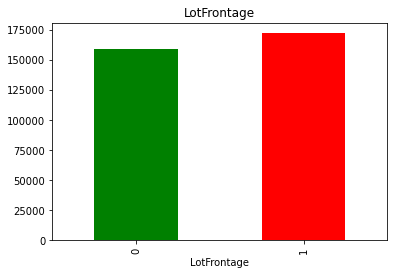

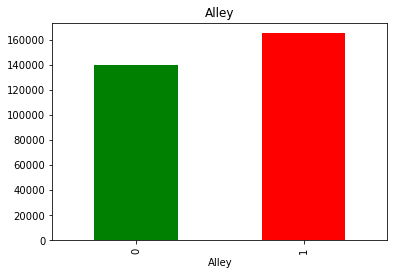

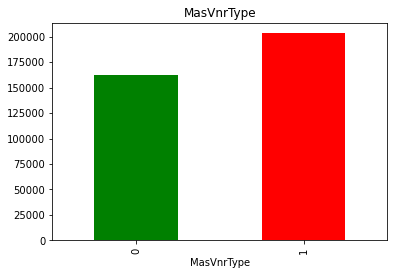

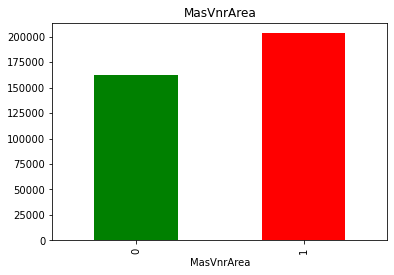

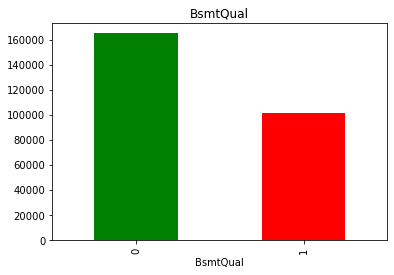

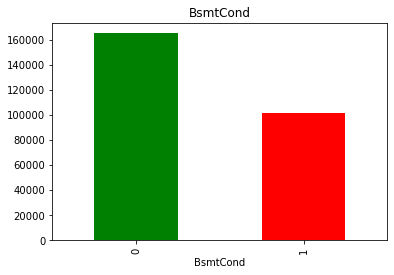

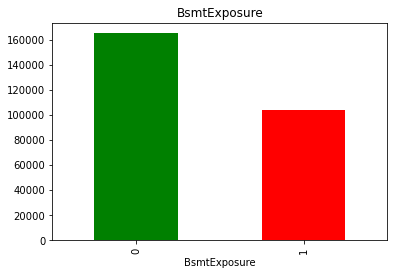

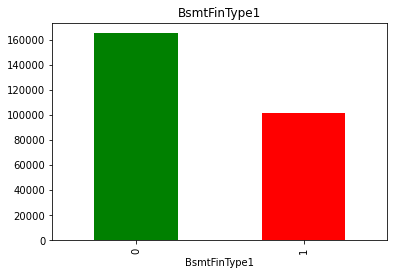

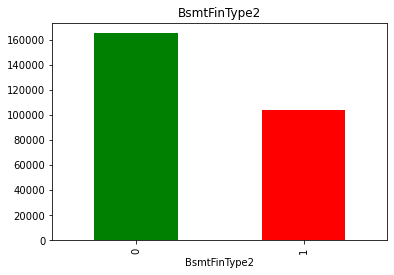

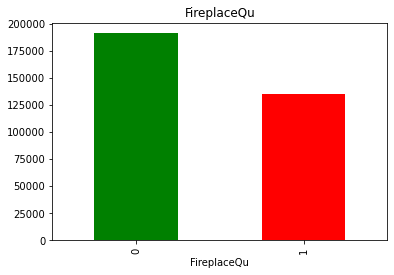

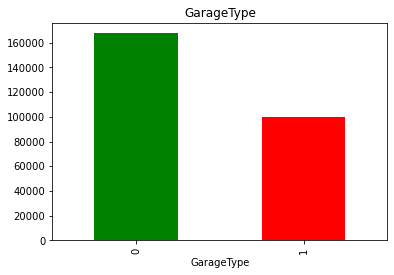

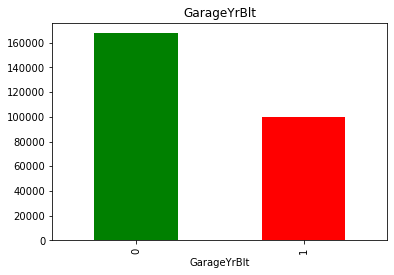

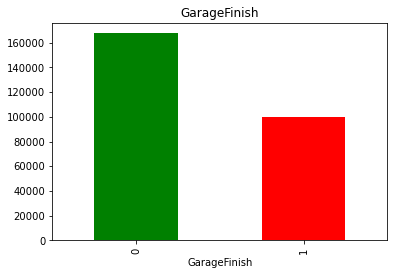

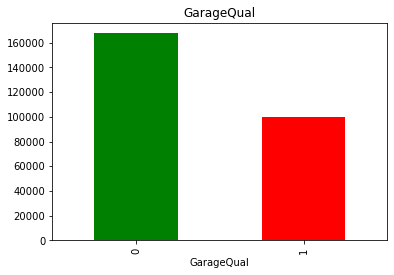

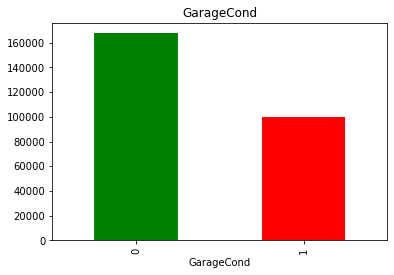

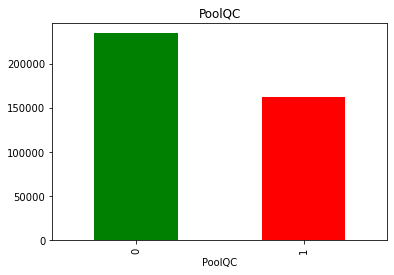

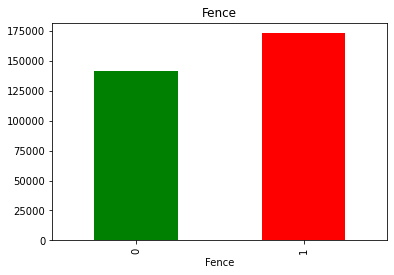

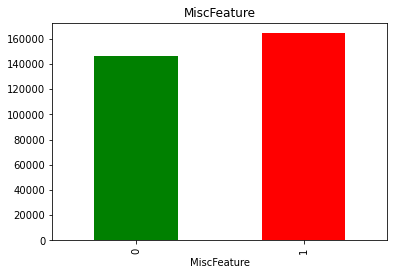

In [5]:
# plot some diagrams
for feature in features_with_nan_values:
    data = dataset.copy()

    # let create a new dataset where we will have 1 if null, else 0
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['g', 'r'])
    plt.title(feature)
    plt.show()

From the previous plots, we can observe that the missing values are playing a significant role in the median sale price of the house. The median price is either high or low. If a feature has a similar median price for the missing value and non, then we can say that missing values are not influencing the sale price, so we could ignore them. But in our case it is not, so we have to replace them with something meaningful. Which we will do later during the *feature engineering*.

### Numerical Variables
Let's find how many numerical features do we have in the data set.

In [6]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O'] # if dtype is not O:object

print('Data set has {0} numerical features'.format(len(numerical_features)))

dataset[numerical_features].head()

Data set has 38 numerical features


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal features
We can observe that, in our data set we have some temporal features. Which contain year information. Let's find them.

In [7]:
temporal_features = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Let's explore the content of these temporal features

In [8]:
for feature in temporal_features:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Now let's try to find out the relationship between these temporal features and the Sale Price

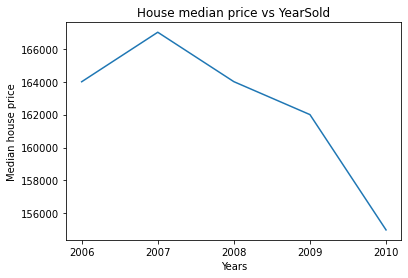

In [9]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Years')
plt.xticks(range(dataset['YrSold'].min(), dataset['YrSold'].max()+1))
plt.ylabel('Median house price')
plt.title('House median price vs YearSold')
plt.show()

From this plot we can see a very strange behaviour. The price goes down as the year increase. Tipically it is oposit, the house gets value with time. But here may be the downtrend was caused by the house market situation, the crisis of 2008, where the house market lose a lot of value.

Now let's see other temporal features. We could compare them with the median Sale Price. 

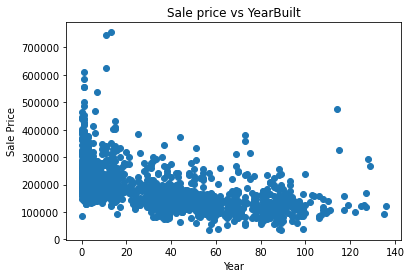

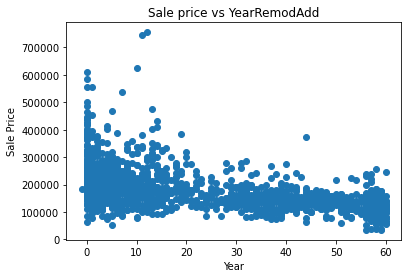

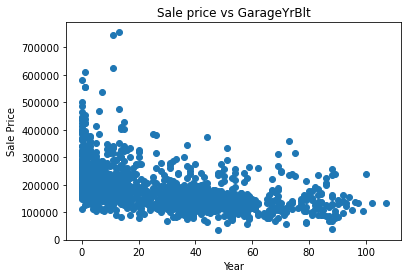

In [10]:
for temp_feature in temporal_features:
    if temp_feature != 'YrSold':
        data = dataset.copy()
        # difference between year variable and the house sold year
        data[temp_feature]=data['YrSold']-data[temp_feature]
        
        plt.scatter(data[temp_feature], data['SalePrice'])
        plt.xlabel('Year')
        plt.ylabel('Sale Price')
        plt.title('Sale price vs {}'.format(temp_feature))
        plt.show()


From these scatter plots we can see that they have a natural behaviour. The sale price is high if the house has less year of age, renewal age, garage year...

#### Discrete Variables

In [11]:
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in temporal_features+['Id']]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [12]:
dataset[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [39]:
color_list = list(matColors.TABLEAU_COLORS.keys())
color_list

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

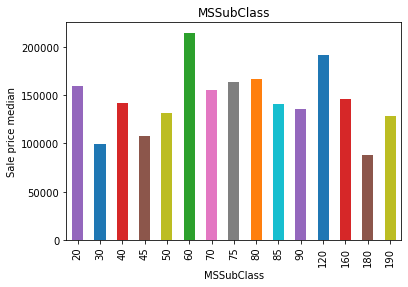

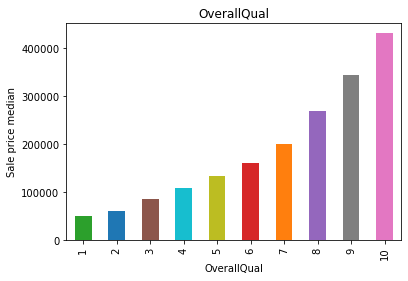

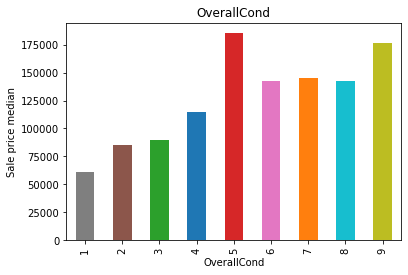

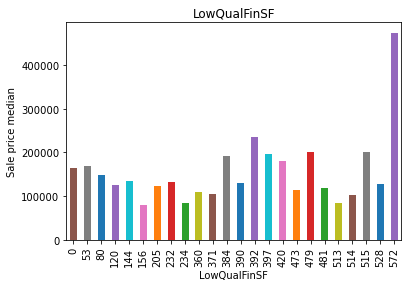

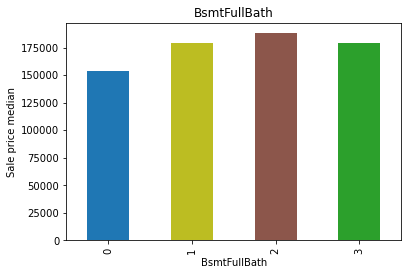

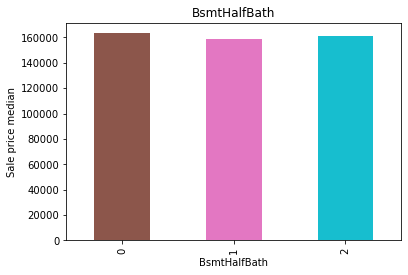

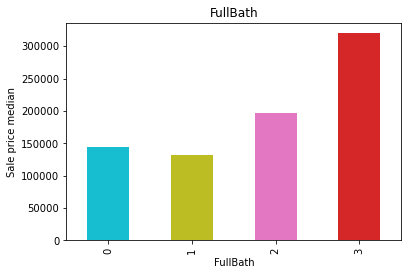

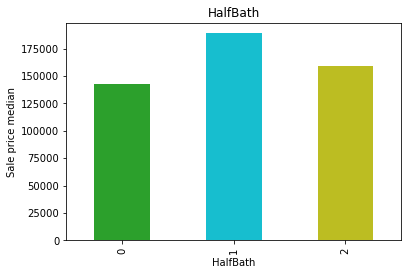

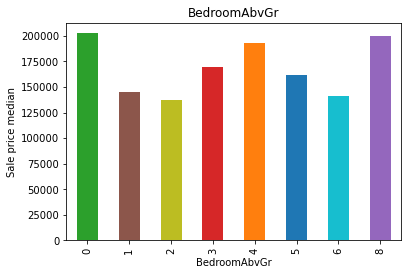

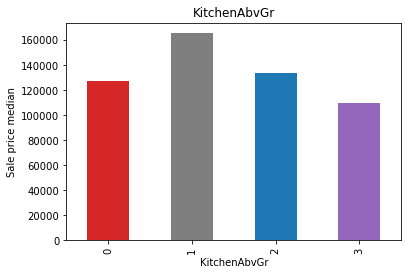

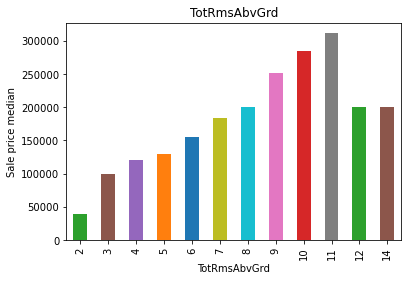

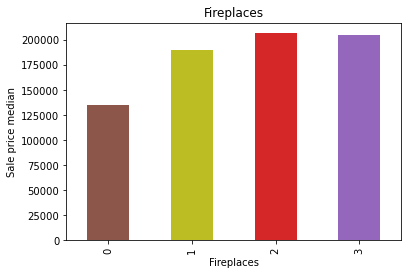

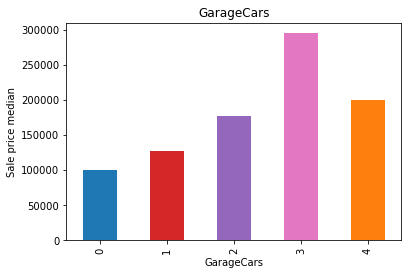

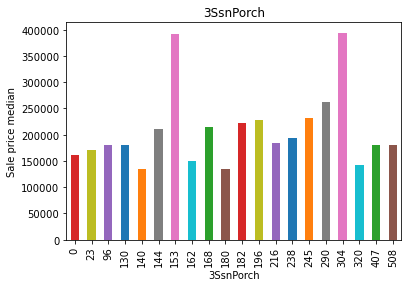

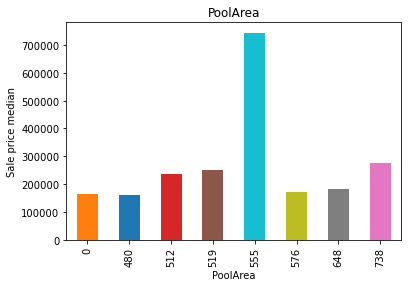

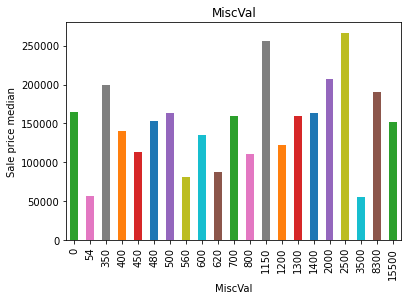

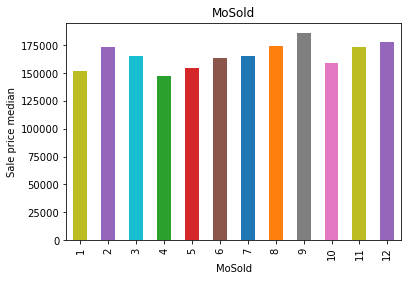

In [41]:
for feature in discrete_features:
    data=dataset.copy()
    random.shuffle(color_list)
    data.groupby(feature)['SalePrice'].median().plot.bar(color=color_list)
    plt.xlabel(feature)
    plt.ylabel('Sale price median')
    plt.title(feature)
    plt.show()

#### Continous Variables

In [42]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_features+temporal_features+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))
dataset[continuous_feature].tail()

Continuous feature Count 16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
1455,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,0,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,0,142125
1459,75.0,9937,0.0,830,290,136,1256,1256,0,1256,276,736,68,0,0,147500


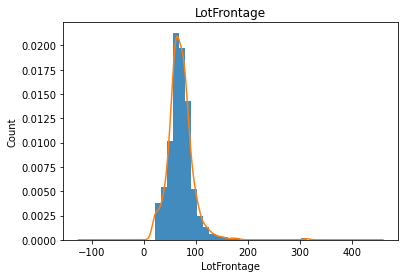

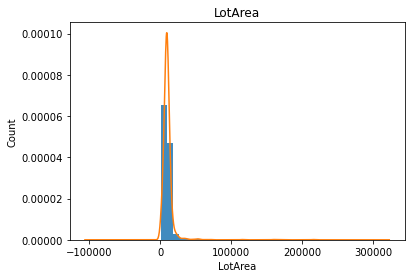

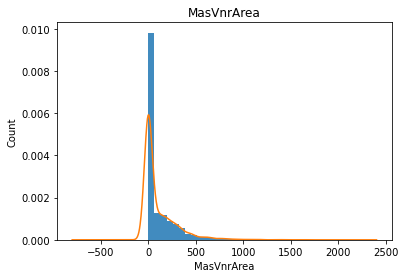

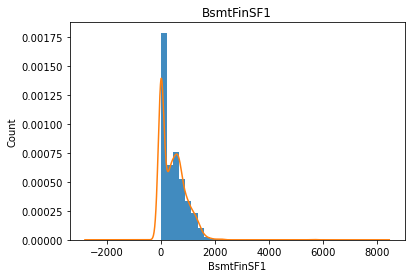

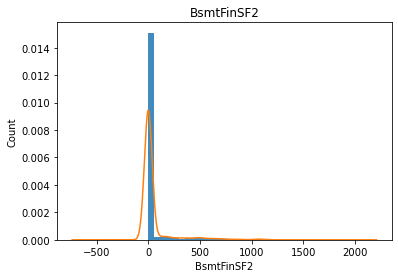

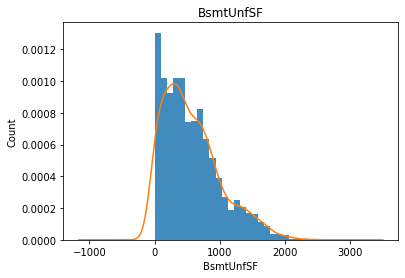

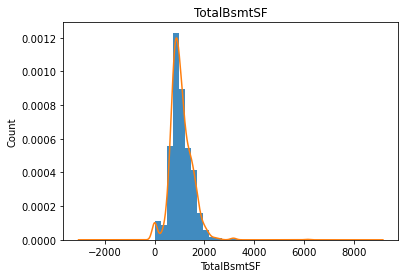

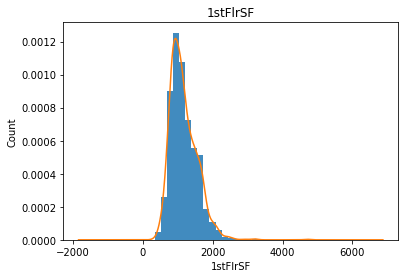

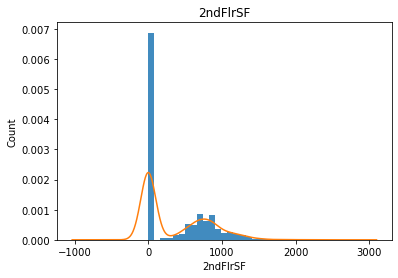

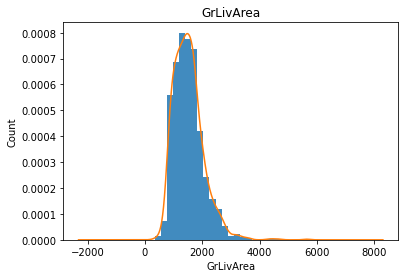

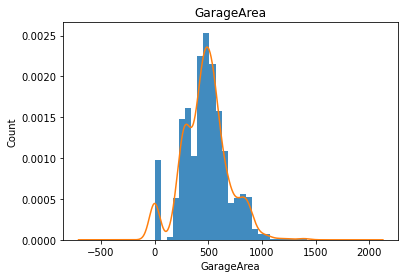

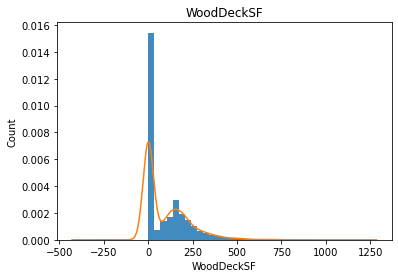

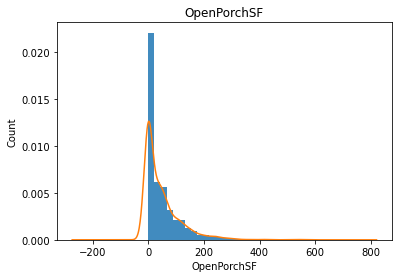

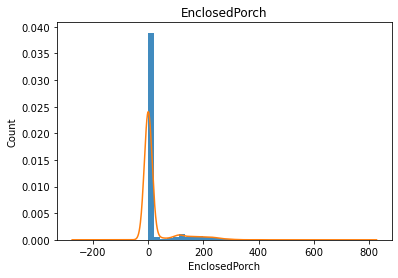

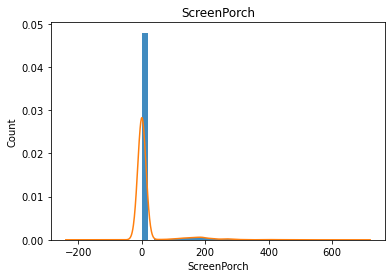

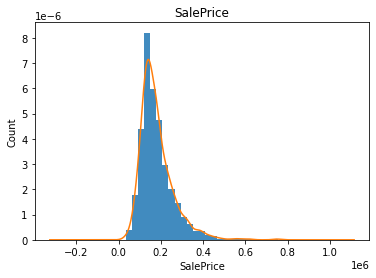

In [43]:


## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(density = True, alpha = 0.85, bins = 25)
    data[feature].plot(kind = "kde")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()



Here we can observe that some features follow the normal distribution and others not.

For the features which do not follow the normal distribution, we will try to transform them.

##### Logaritmic Transformation

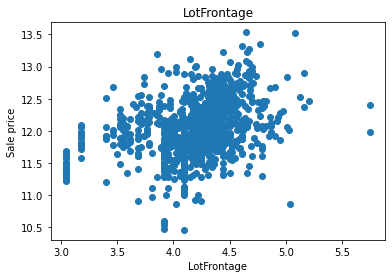

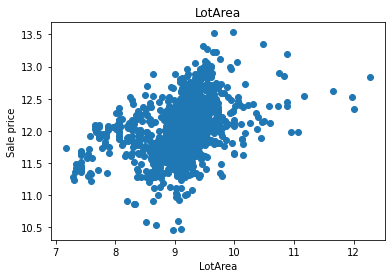

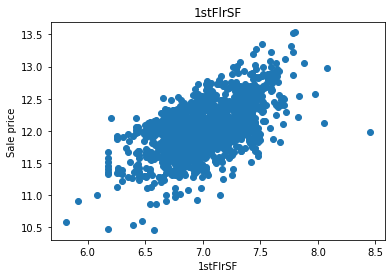

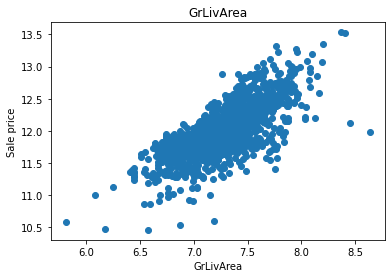

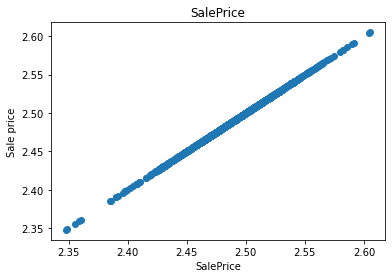

In [44]:
# logaritmic transformation

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale price')
        plt.title(feature)
        plt.show()

##### Outliers of Continous features

Find outliers with BoxPlots

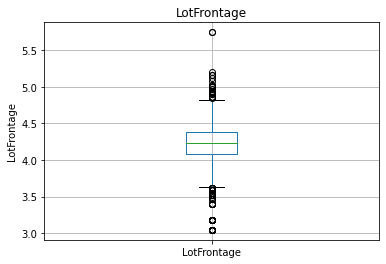

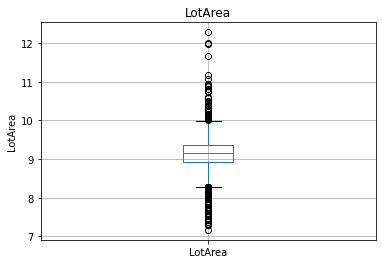

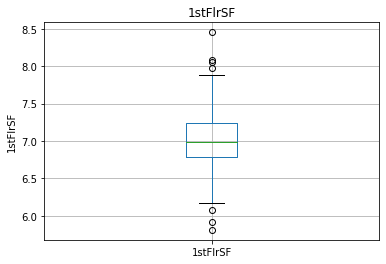

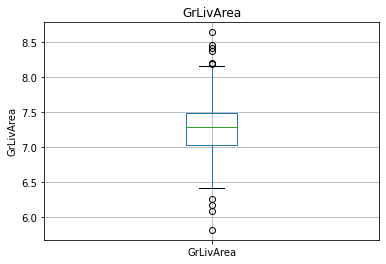

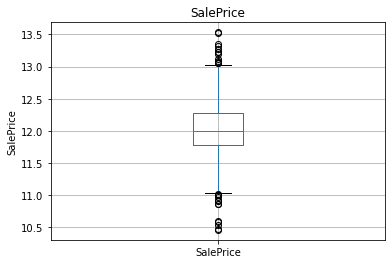

In [45]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Variables

In [46]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtype=='O']
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [47]:
for feature in categorical_features:
    print('{} feature has categories: {}'.format(feature, len(dataset[feature].unique())))

MSZoning feature has categories: 5
Street feature has categories: 2
Alley feature has categories: 3
LotShape feature has categories: 4
LandContour feature has categories: 4
Utilities feature has categories: 2
LotConfig feature has categories: 5
LandSlope feature has categories: 3
Neighborhood feature has categories: 25
Condition1 feature has categories: 9
Condition2 feature has categories: 8
BldgType feature has categories: 5
HouseStyle feature has categories: 8
RoofStyle feature has categories: 6
RoofMatl feature has categories: 8
Exterior1st feature has categories: 15
Exterior2nd feature has categories: 16
MasVnrType feature has categories: 5
ExterQual feature has categories: 4
ExterCond feature has categories: 5
Foundation feature has categories: 6
BsmtQual feature has categories: 5
BsmtCond feature has categories: 5
BsmtExposure feature has categories: 5
BsmtFinType1 feature has categories: 7
BsmtFinType2 feature has categories: 7
Heating feature has categories: 6
HeatingQC feature

In [48]:
# for example lets see Neighborhood classes
dataset['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

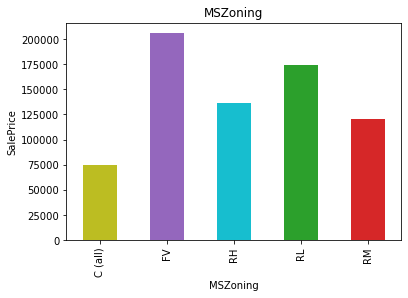

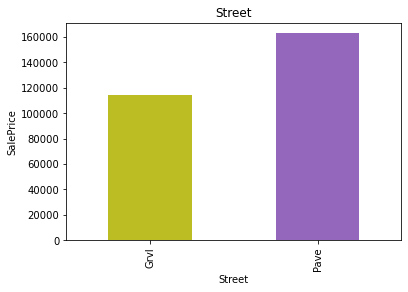

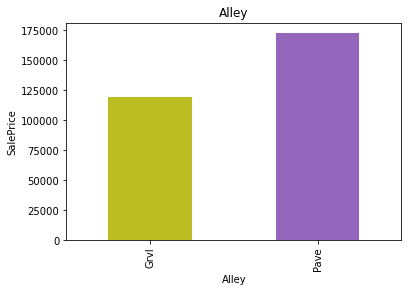

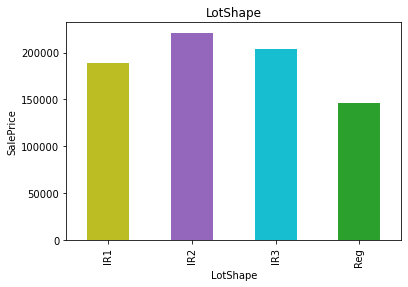

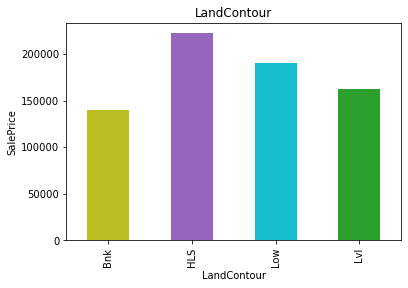

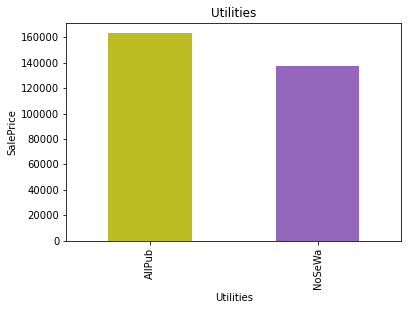

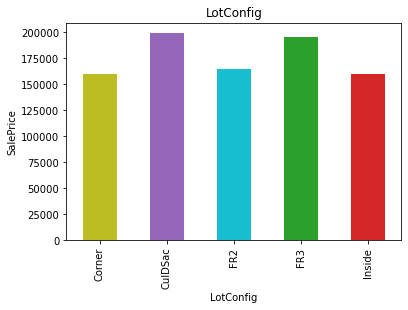

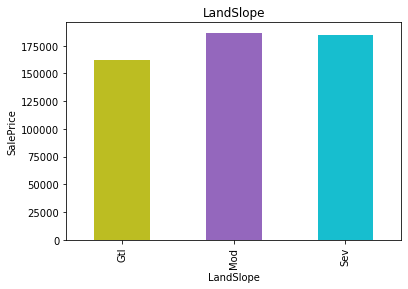

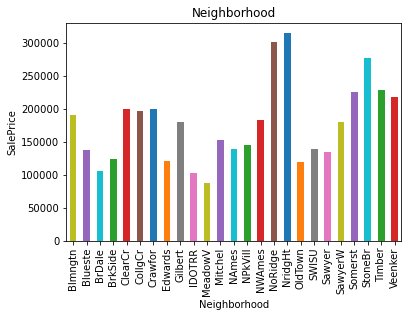

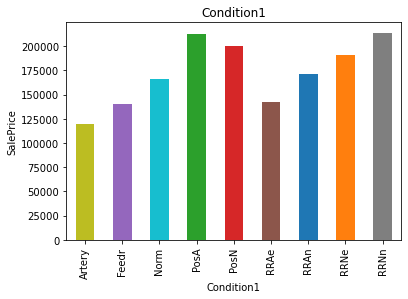

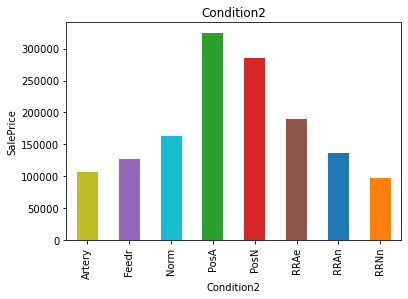

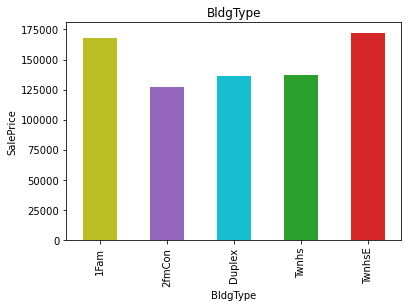

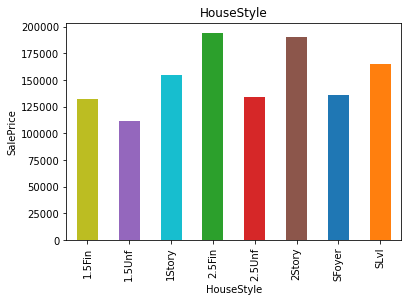

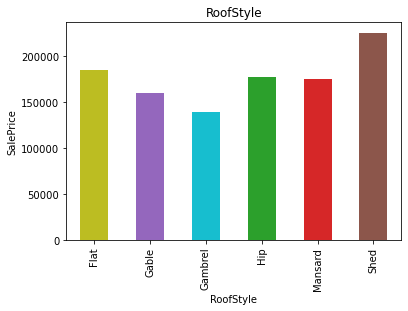

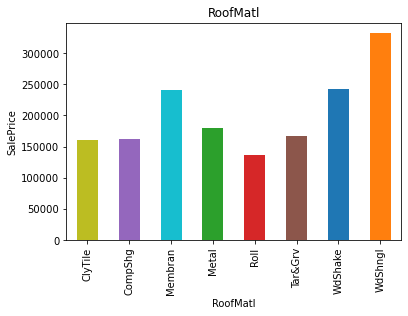

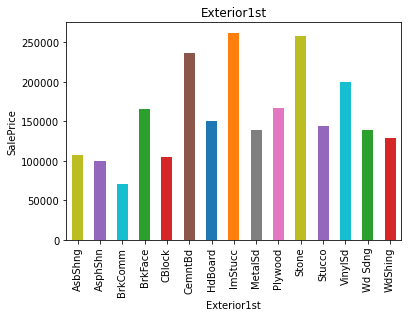

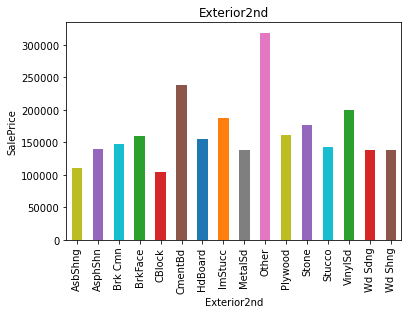

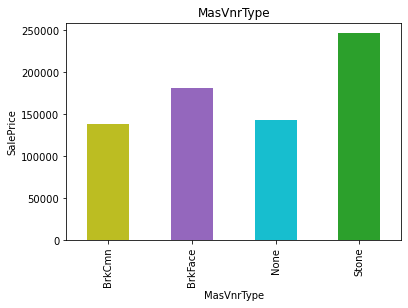

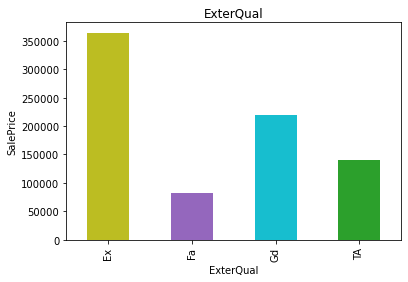

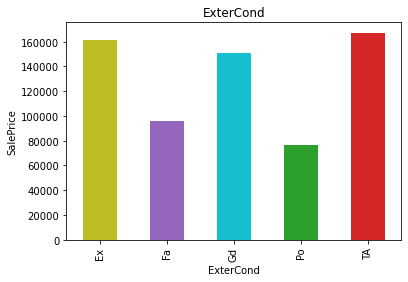

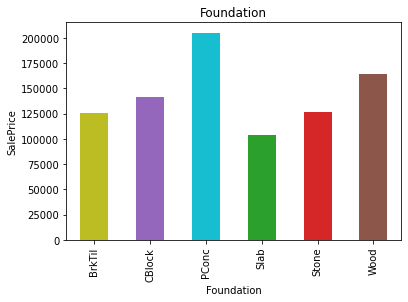

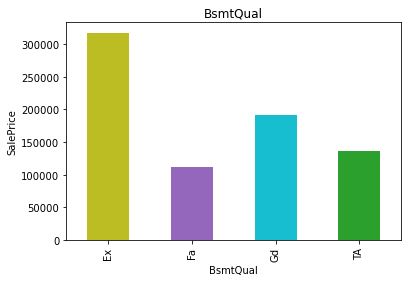

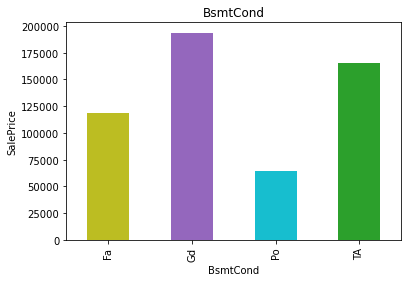

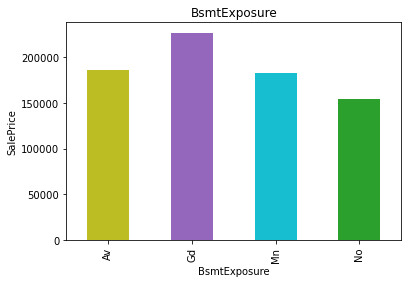

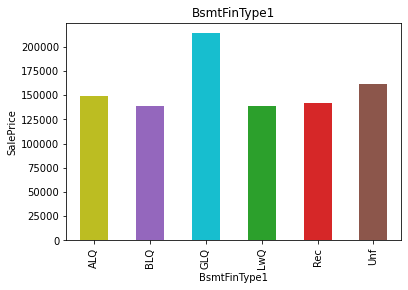

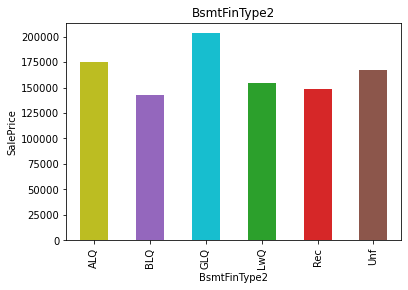

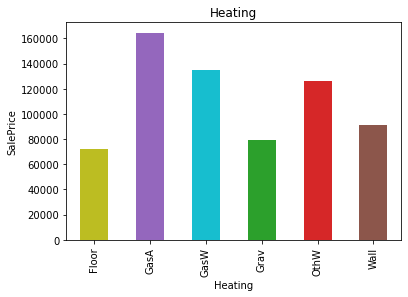

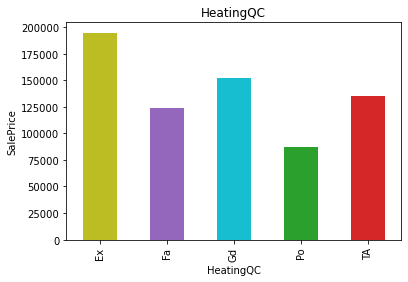

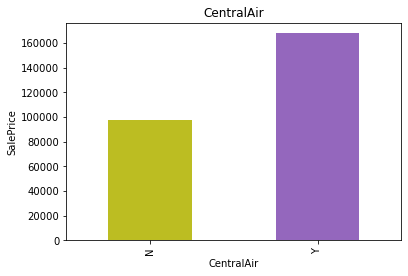

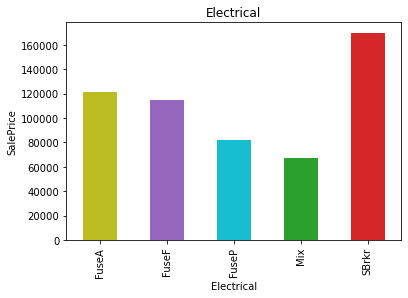

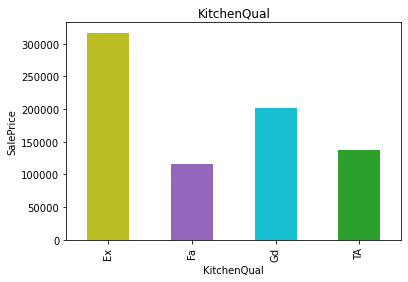

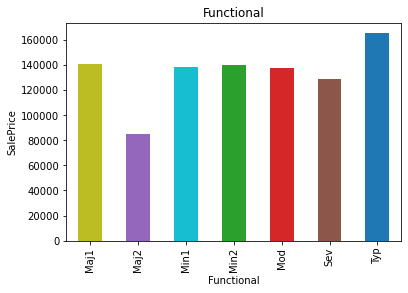

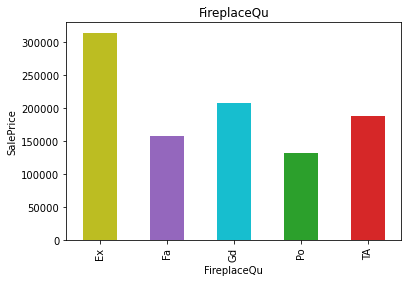

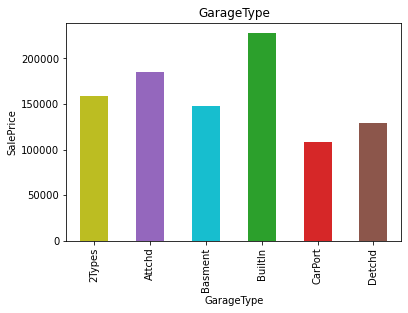

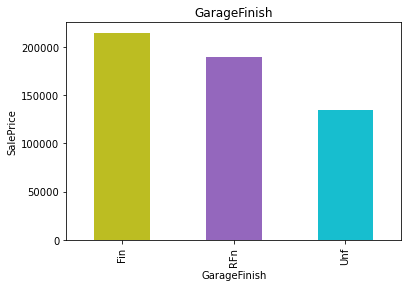

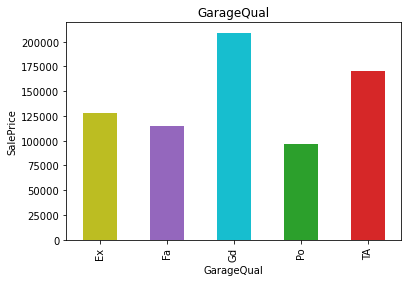

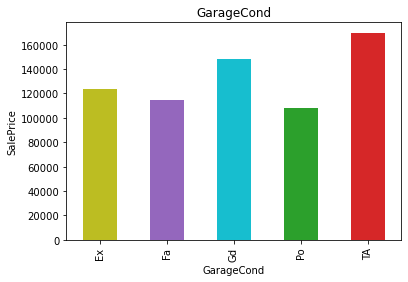

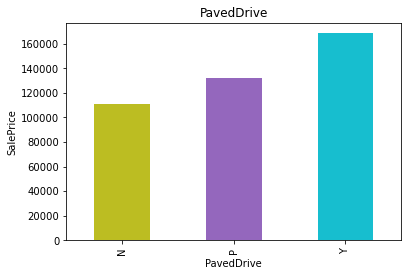

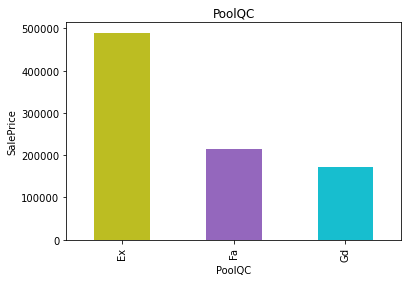

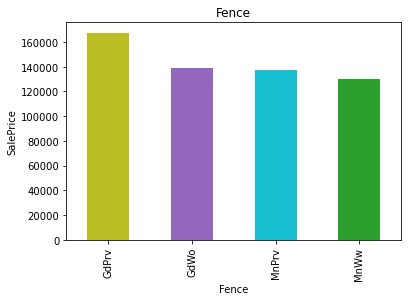

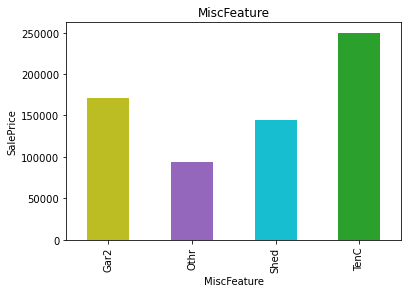

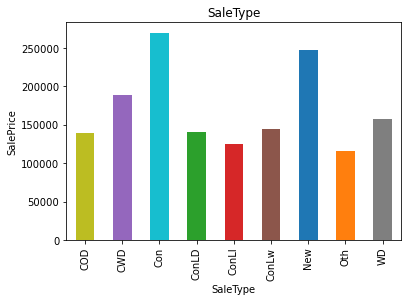

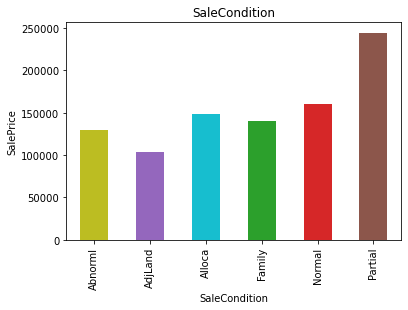

In [49]:
# relationship between categorical var and the dependent feature (Sale Price)

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=color_list)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()